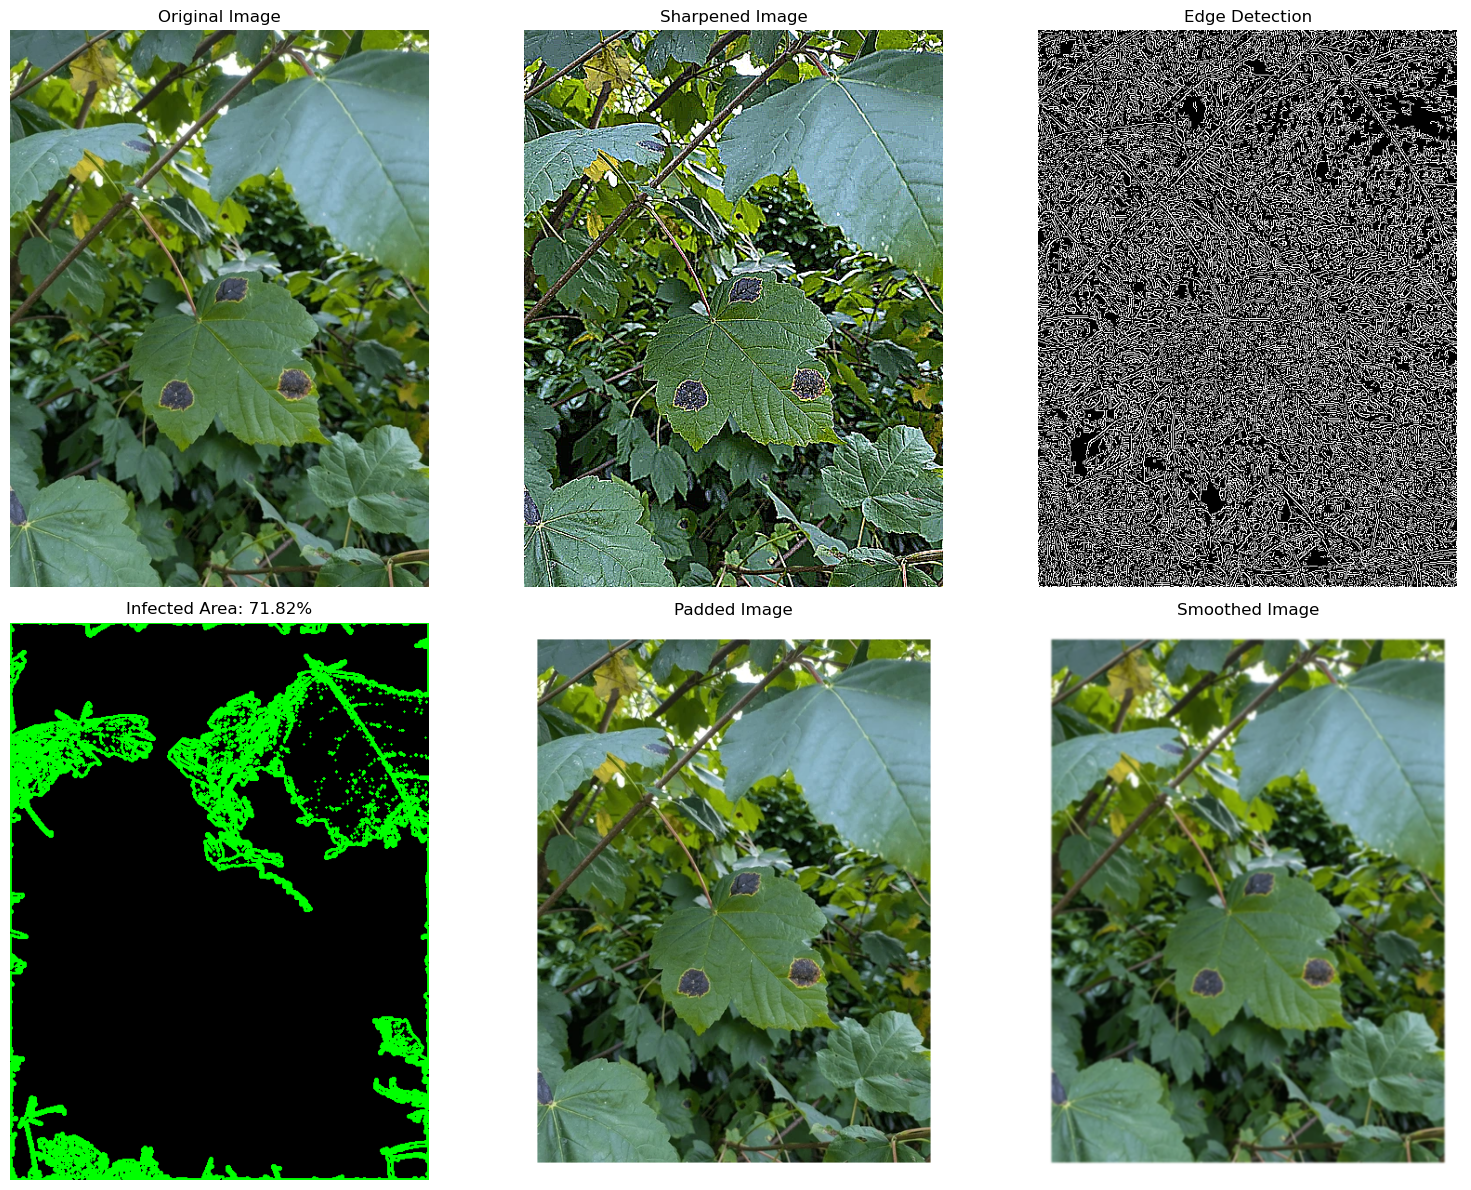

Infected Area Percentage: 71.82%


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the Image
image_path = r"C:\Users\acer\Downloads\leaf_image.jpeg"  # Replace with the path to your image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 1: Sharpen the Image
kernel_sharpening = np.array([[-1, -1, -1],
                               [-1,  9, -1],
                               [-1, -1, -1]])
sharpened = cv2.filter2D(image, -1, kernel_sharpening)

# Step 2: Edge Detection
edges = cv2.Canny(sharpened, threshold1=50, threshold2=150)

# Step 3: Find Infected Area
# Convert to grayscale for thresholding
gray = cv2.cvtColor(sharpened, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
infected_area = cv2.drawContours(np.zeros_like(image), contours, -1, (0, 255, 0), 2)

# Calculate infected area percentage
leaf_area = np.count_nonzero(gray > 0)
infected_pixels = np.count_nonzero(thresh)
infected_percentage = (infected_pixels / leaf_area) * 100

# Step 4: Add Padding
padded = cv2.copyMakeBorder(image, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=[255, 255, 255])

# Step 5: Smoothening
smoothed = cv2.GaussianBlur(padded, (5, 5), 0)

# Display Results
plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Original Image")

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Sharpened Image")

plt.subplot(2, 3, 3)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title("Edge Detection")

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(infected_area, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Infected Area: {infected_percentage:.2f}%")

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(padded, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Padded Image")

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(smoothed, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Smoothed Image")

plt.tight_layout()
plt.show()

print(f"Infected Area Percentage: {infected_percentage:.2f}%")
